In [83]:
# Data process
import pandas as pd
import numpy as np
# SARIMA Model
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
# Other
import datetime
import pickle
from plotly_utils.utils import get_plotly_fig

%matplotlib inline
pylab.rcParams['figure.figsize'] = 12, 4

In [99]:
df = pd.read_pickle("../datasets/new_full_task2.pkl")

In [89]:
columns = ['T1D0', 'T1D1', 'T2D0', 'T3D0', 'T3D1']
holidays = ['NationalDayFront(1-4)', 'NationalDayTail(5-7)']

In [102]:
holidays_diff = df[columns].groupby(
    [df[holidays].sum(axis=1), df.index.map(lambda dt:dt.time)]).mean().loc[1,] - df[columns].groupby(
    [df[holidays].sum(axis=1), df.index.map(lambda dt:dt.time)]).mean().loc[0,]

In [103]:
holidays_index = df[(df[holidays].sum(axis=1) == 1 ) ].index

In [104]:
504/72

7.0

In [105]:
holidays10_diff = pd.concat([holidays_diff] * 7)
holidays10_diff.index = holidays_index

In [106]:
df.loc[holidays_index, columns] = df.loc[holidays_index, columns] - holidays10_diff

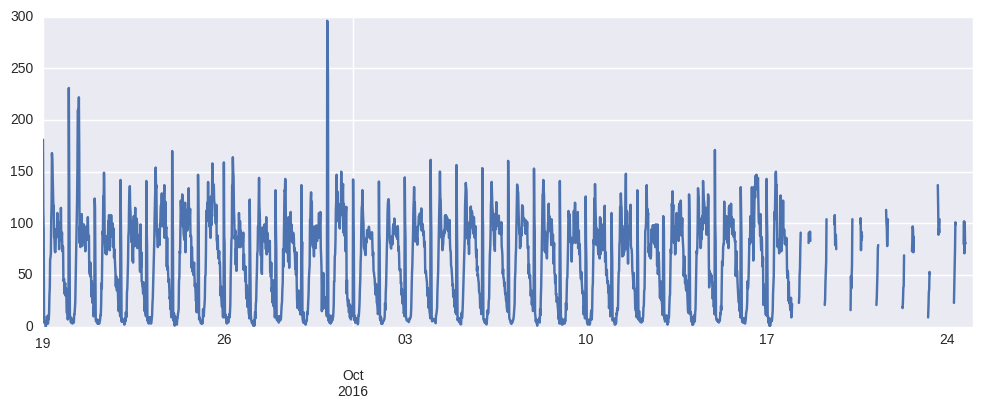

In [112]:
df['T3D1'].plot()